# Chapter 0 - Gradient Descent with Generated Data

In [26]:
# Common imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Synthetic Data Generation
We will generate data with some random error:

In [27]:
# Syntetic Data Generation
true_b = 1
true_w = 2
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (0.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

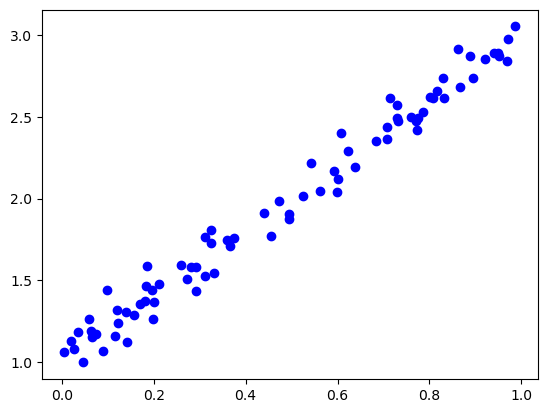

In [28]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Training set 80%
train_idx = idx[:int(N*.8)]
# graph test data
plt.scatter(x[train_idx], y[train_idx], color='blue')

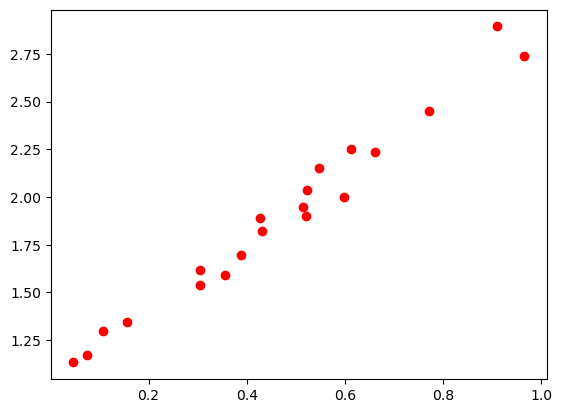

In [29]:
# Test set 20%
test_idx = np.setdiff1d(idx, train_idx)
test_idx

# graph test data
plt.scatter(x[test_idx], y[test_idx], color='red')

In [47]:
# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# Data for verification with sklearn
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg.intercept_, lin_reg.coef_

(array([1.02354075]), array([[1.96896447]]))

In [31]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
initial_b = np.random.randn(1)
b = initial_b
initial_w = np.random.randn(1)
w = initial_w
print(b, w)

[0.49671415] [-0.1382643]


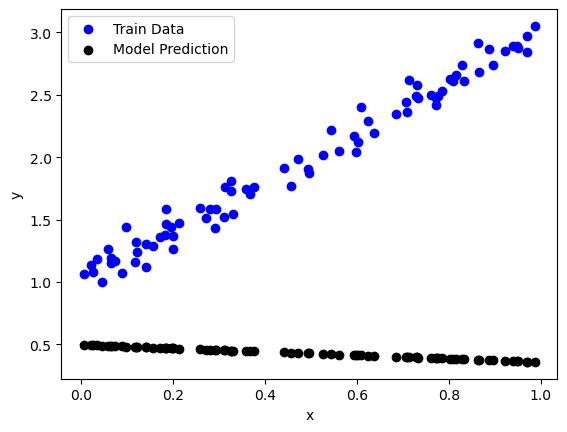

In [32]:
# Step 1 - First forward pass
yhat = b + w * x_train
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.scatter(x_train, yhat, color='black', label='Model Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [33]:
# Step 2 - Computing loss

error = yhat - y_train
loss = (error ** 2).mean()
loss

2.7421577700550976

# Loss Surface

In [34]:
b_range = np.linspace(true_b - 3, true_b + 3, 100)
w_range = np.linspace(true_w - 3, true_w + 3, 100)
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((100, 100), (100, 100))

In [35]:
all_predictions = np.apply_along_axis(func1d=lambda x: bs + ws * x, axis=1, arr=x_train)
all_predictions.shape

(80, 100, 100)

In [36]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [37]:
all_errors = all_predictions - all_labels
all_errors.shape

(80, 100, 100)

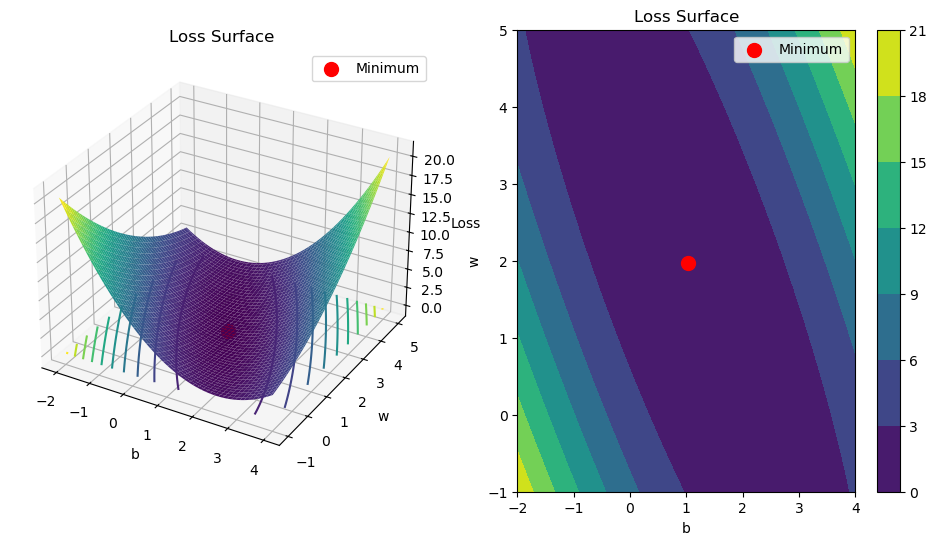

In [38]:
all_loses = (all_errors ** 2).mean(axis=0)
fig = plt.figure(figsize=(12, 6))

# 3D plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(bs, ws, all_loses, cmap='viridis')
ax1.contour(bs, ws, all_loses, levels=np.arange(0, np.max(all_loses), 2), cmap='viridis', offset=0)
ax1.set_xlabel('b')
ax1.set_ylabel('w')
ax1.set_zlabel('Loss')
ax1.set_title('Loss Surface')

# Add minimum point to 3D plot
min_idx = np.unravel_index(np.argmin(all_loses, axis=None), all_loses.shape)
ax1.scatter(bs[min_idx], ws[min_idx], all_loses[min_idx], color='red', s=100, label='Minimum')
ax1.legend()

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(bs, ws, all_loses, cmap='viridis')
fig.colorbar(contour, ax=ax2)
ax2.set_xlabel('b')
ax2.set_ylabel('w')
ax2.set_title('Loss Surface')

# Add minimum point to contour plot
ax2.scatter(bs[min_idx], ws[min_idx], color='red', s=100, label='Minimum')
ax2.legend()

plt.show()

# Cross-Sections

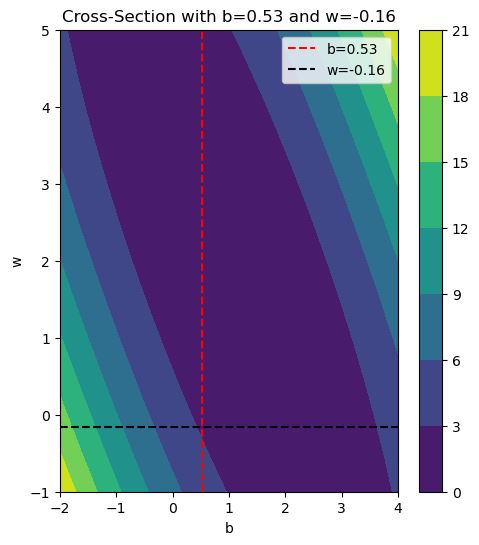

In [39]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(122)
contour = ax1.contourf(bs, ws, all_loses, cmap='viridis')
fig.colorbar(contour, ax=ax1)

# Cross-section with b = 0.52
b = 0.53
ax1.axvline(x=b, color='red', linestyle='--', label=f"b={b}")
# Cross-section with w = -0.16
w = -0.16
ax1.axhline(y=w, color='black', linestyle='--', label=f"w={w}")
ax1.legend()
ax1.set_xlabel('b')
ax1.set_ylabel('w')
ax1.set_title(f'Cross-Section with b={b} and w={w}')

plt.show()

# Compute Gradients

In [40]:
# Compute gradients
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
b_grad, w_grad

(-3.044811379650508, -1.8337537171510832)

# Learning Rate

0.53 -0.16
0.8344811379650509 0.023375371715108312


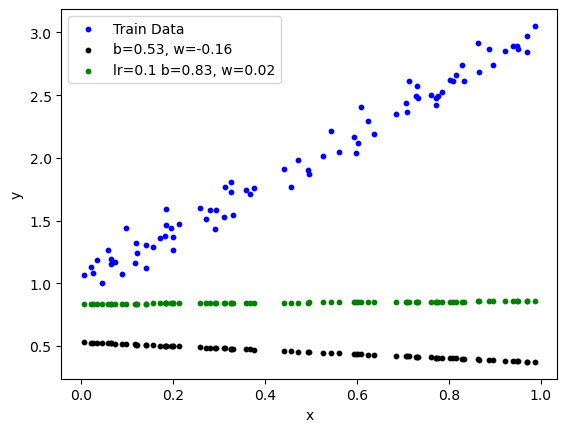

In [41]:
lr = 0.1
print(b, w)

# Update parameters
b_new = b - lr * b_grad
w_new = w - lr * w_grad
print(b_new, w_new)

# Forward pass
yhat = b + w * x_train
yhat_new = b_new + w_new * x_train
plt.scatter(x_train, y_train, color="blue", label="Train Data", s=10)
plt.scatter(x_train, yhat, color="black", label=f"b={b:.2f}, w={w:.2f}", s=10)
plt.scatter(x_train, yhat_new, color="green", label=f"lr={lr} b={b_new:.2f}, w={w_new:.2f}", s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Training with a Very High Learning Rate
Let's try with a learning rate of 1.1

0.53 -0.16
0.53 -0.16


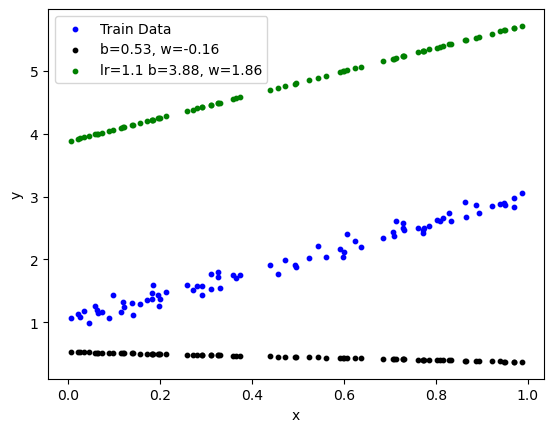

In [42]:
lr = 1.1
print(b, w)

# Update parameters
b_new = b - lr * b_grad
w_new = w - lr * w_grad
print(b, w)

# First forward pass
yhat_new = b_new + w_new * x_train
plt.scatter(x_train, y_train, color="blue", label="Train Data", s=10)
plt.scatter(x_train, yhat, color="black", label=f"b={b:.2f}, w={w:.2f}", s=10)
plt.scatter(x_train, yhat_new, color="green", label=f"lr={lr} b={b_new:.2f}, w={w_new:.2f}", s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Feature Normalization
Normalizing the features before training.

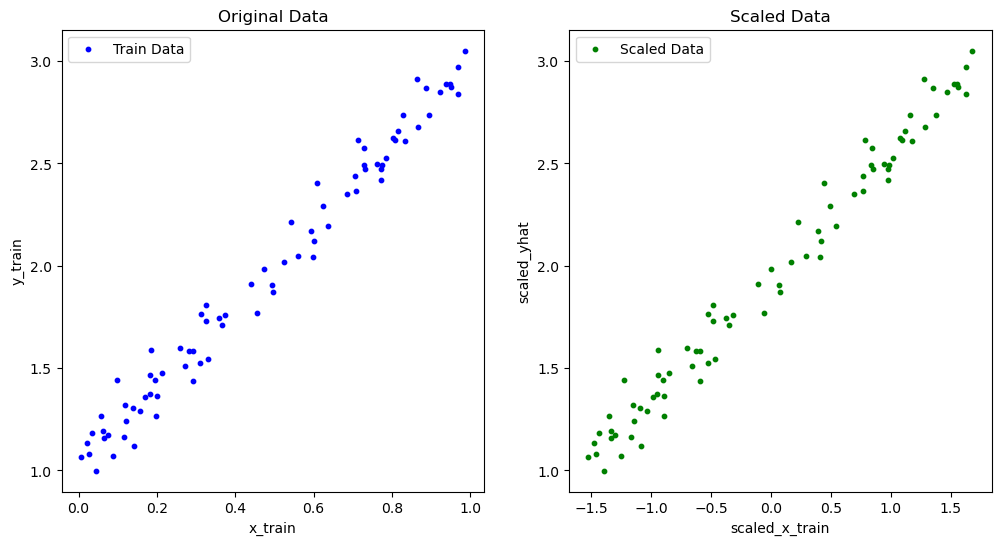

In [43]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(x_train)

scaled_x_train = scaler.transform(x_train)
scaled_x_train.mean(), scaled_x_train.std()
# Forward pass
scaled_yhat = b + w * scaled_x_train

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Train Data Plot
ax1.scatter(x_train, y_train, color="blue", label="Train Data", s=10)
ax1.set_title("Original Data")
ax1.set_xlabel("x_train")
ax1.set_ylabel("y_train")
ax1.legend()

# Scaled Data Plot
ax2.scatter(scaled_x_train, y_train, color="green", label="Scaled Data", s=10)
ax2.set_title("Scaled Data")
ax2.set_xlabel("scaled_x_train")
ax2.set_ylabel("scaled_yhat")
ax2.legend()

plt.show()

# Batch Gradient Descent
We use all the points to calculate the loss.

Epoch: 000, Loss: 2.6805, b: [0.78813045], w: [0.00997776]
Epoch: 010, Loss: 0.0389, b: [1.82863329], w: [0.53927654]


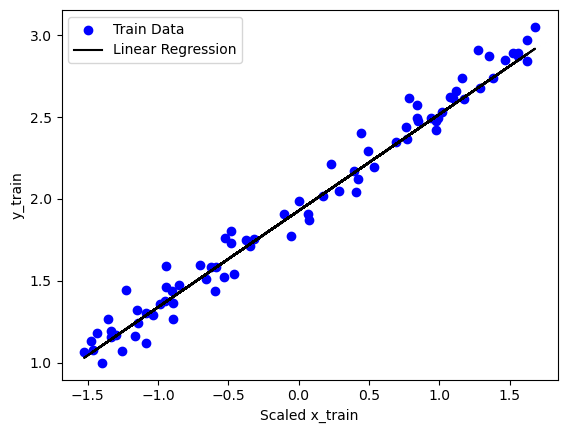

Unscaled b: [1.01789314], Unscaled w: [1.92536104]


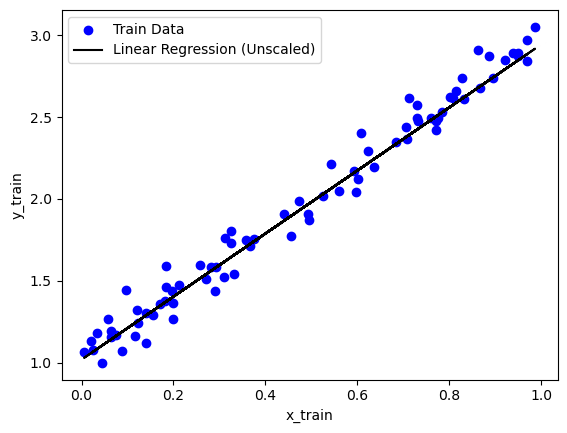

epoch: 17 b diff: [0.00564762], w diff: [[0.04360343]], loss: 0.009399765640773397


In [56]:
N_EPOCHS = 1000
lr = 0.1
loss_limit = 0.01
b = initial_b
w = initial_w
for epoch in range(N_EPOCHS):
    # Step 1 - Forward Pass
    yhat = b + w * scaled_x_train

    # Step 2 - Compute Loss
    error = yhat - y_train

    # Step 3 - Compute Gradients
    b_grad = 2 * error.mean()
    w_grad = 2 * (scaled_x_train * error).mean()

    # Step 4 - Update Parameters

    b = b - lr * b_grad
    w = w - lr * w_grad

    loss = (error**2).mean()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch:03d}, Loss: {loss:.4f}, b: {b}, w: {w}")

    if loss < loss_limit:
        break

# Plot the linear regression line along with the train dataset
plt.scatter(scaled_x_train, y_train, color="blue", label="Train Data")
plt.plot(
    scaled_x_train, b + w * scaled_x_train, color="black", label="Linear Regression"
)
plt.xlabel("Scaled x_train")
plt.ylabel("y_train")
plt.legend()
plt.show()

# Scale back the parameters
b_unscaled = b - w * scaler.mean_ / scaler.scale_
w_unscaled = w / scaler.scale_

print(f"Unscaled b: {b_unscaled}, Unscaled w: {w_unscaled}")

# Plot the linear regression line along with the original train dataset
plt.scatter(x_train, y_train, color="blue", label="Train Data")
plt.plot(
    x_train,
    b_unscaled + w_unscaled * x_train,
    color="black",
    label="Linear Regression (Unscaled)",
)
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.legend()
plt.show()

# Verification with sklearn model
diff = np.abs(lin_reg.intercept_ - b_unscaled), np.abs(lin_reg.coef_ - w_unscaled)
print(f"epoch: {epoch} b diff: {diff[0]}, w diff: {diff[1]}, loss: {loss}")

# Mini-Batch Gradient Descent
We use a subset of points to calculate the loss.

maxepoch: 1000 batchsz: 10, lr: 0.1, loss_limit: 1e-06
Epoch: 000, Loss: 0.0757, b: [1.74356936], w: [0.51972546]
Epoch: 010, Loss: 0.0105, b: [1.96379079], w: [0.59816574]
Epoch: 020, Loss: 0.0019, b: [1.95185731], w: [0.60798659]
Epoch: 030, Loss: 0.0121, b: [1.95845807], w: [0.61373266]
Epoch: 040, Loss: 0.0104, b: [1.96184117], w: [0.59629469]
Epoch: 050, Loss: 0.0130, b: [1.96312488], w: [0.61665621]
Epoch: 060, Loss: 0.0047, b: [1.95061627], w: [0.60079892]
Epoch: 070, Loss: 0.0087, b: [1.95006436], w: [0.58941781]
Epoch: 080, Loss: 0.0033, b: [1.94788396], w: [0.60343007]
Epoch: 090, Loss: 0.0068, b: [1.96291145], w: [0.60726742]
Epoch: 100, Loss: 0.0157, b: [1.93918656], w: [0.5966964]
Epoch: 110, Loss: 0.0047, b: [1.95759747], w: [0.5894832]
Epoch: 120, Loss: 0.0078, b: [1.95788309], w: [0.61010153]
Epoch: 130, Loss: 0.0118, b: [1.96731723], w: [0.6047514]
Epoch: 140, Loss: 0.0142, b: [1.95096369], w: [0.6055042]
Epoch: 150, Loss: 0.0068, b: [1.95829321], w: [0.61784868]
Epoch

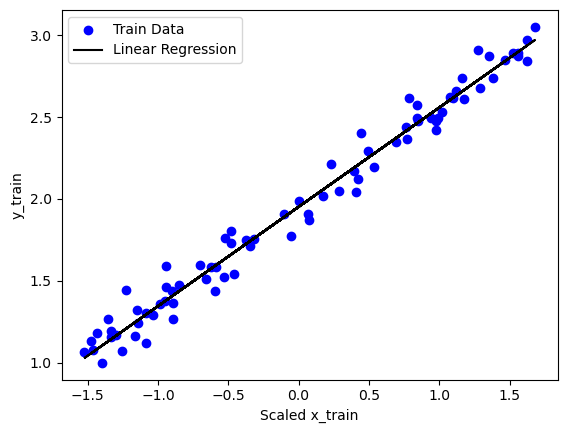

Unscaled b: [1.01511604], Unscaled w: [1.9823289]


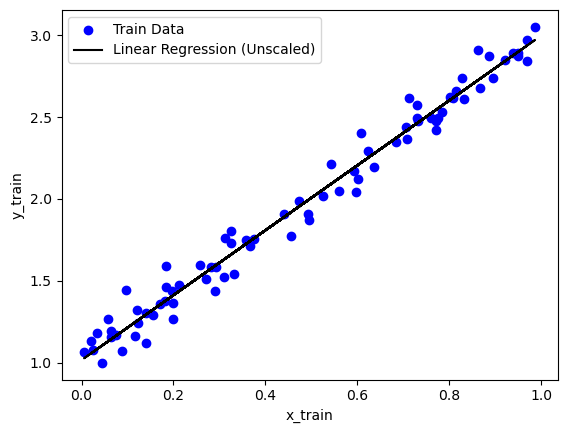

epoch: 999 b diff: [0.00842472], w diff: [[0.01336443]], loss: 0.005901051071336529


In [45]:
N_EPOCHS = 1000
lr = 0.1
batch_size = N // 10
loss_limit = 1e-3
b = initial_b
w = initial_w
print(f"maxepoch: {N_EPOCHS} batchsz: {batch_size}, lr: {lr}, loss_limit: {loss_limit}")
for epoch in range(N_EPOCHS):
    for _ in range(0, len(x_train), batch_size):
        # Step 1 - Forward Pass
        batch_indices = np.random.choice(len(x_train), batch_size, replace=False)
        x_batch = scaled_x_train[batch_indices]
        y_batch = y_train[batch_indices]
        yhat = b + w * x_batch

        # Step 2 - Compute Loss
        error = yhat - y_batch

        # Step 3 - Compute Gradients
        b_grad = 2 * error.mean()
        w_grad = 2 * (x_batch * error).mean()

        # Step 4 - Update Parameters
        b = b - lr * b_grad
        w = w - lr * w_grad

    loss = (error**2).mean()
    if epoch % 10 == 0:
        print(f"Epoch: {epoch:03d}, Loss: {loss:.4f}, b: {b}, w: {w}")
    if loss < loss_limit:
        break

# Plot the linear regression line along with the train dataset
plt.scatter(scaled_x_train, y_train, color="blue", label="Train Data")
plt.plot(
    scaled_x_train, b + w * scaled_x_train, color="black", label="Linear Regression"
)
plt.xlabel("Scaled x_train")
plt.ylabel("y_train")
plt.legend()
plt.show()

# Scale back the parameters
b_unscaled = b - w * scaler.mean_ / scaler.scale_
w_unscaled = w / scaler.scale_

print(f"Unscaled b: {b_unscaled}, Unscaled w: {w_unscaled}")

# Plot the linear regression line along with the original train dataset
plt.scatter(x_train, y_train, color="blue", label="Train Data")
plt.plot(
    x_train,
    b_unscaled + w_unscaled * x_train,
    color="black",
    label="Linear Regression (Unscaled)",
)
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.legend()
plt.show()

diff = np.abs(lin_reg.intercept_ - b_unscaled), np.abs(lin_reg.coef_ - w_unscaled)
print(f"epoch: {epoch} b diff: {diff[0]}, w diff: {diff[1]}, loss: {loss}")

# Stochastic Gradient Descent

Epoch: 000, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 010, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 020, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 030, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 040, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 050, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 060, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 070, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 080, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 090, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 100, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 110, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 120, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 130, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 140, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 150, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 160, Loss: 0.0004, b: [1.93883319], w: [0.6178299]
Epoch: 170, Lo

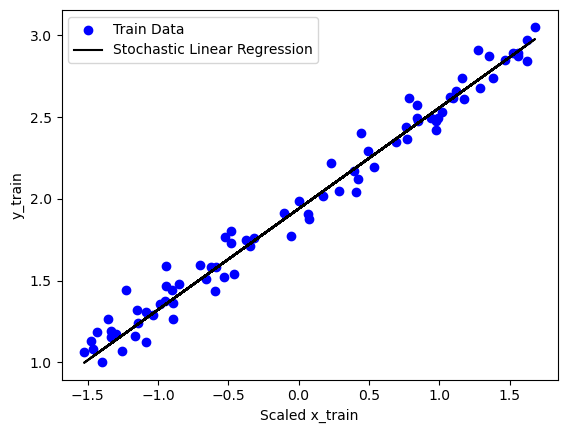

Unscaled b: [0.98561473], Unscaled w: [2.01756886]


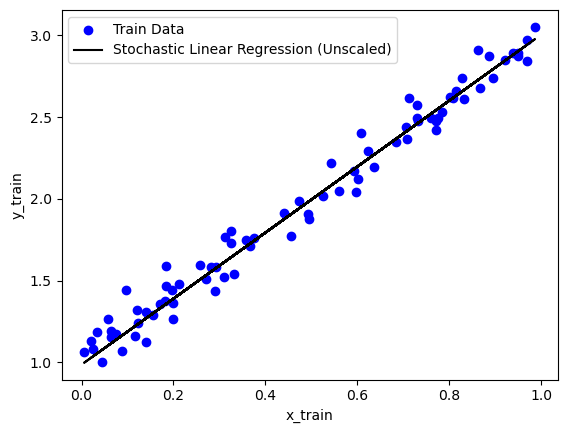

In [61]:
N_EPOCHS = 1000
lr = 0.1
loss_limit = 1e-4
b = initial_b
w = initial_w
for epoch in range(N_EPOCHS):
    for i in range(len(x_train)):
        # Step 1 - Forward Pass
        xi = scaled_x_train[i]
        yi = y_train[i]
        yhat = b + w * xi

        # Step 2 - Compute Loss
        error = yhat - yi
        loss = (error ** 2).mean()

        # Step 3 - Compute Gradients
        b_grad = 2 * error.mean()
        w_grad = 2 * (xi * error).mean()

        # Step 4 - Update Parameters
        b = b - lr * b_grad
        w = w - lr * w_grad

    if epoch % 10 == 0:
        print(f"Epoch: {epoch:03d}, Loss: {loss:.4f}, b: {b}, w: {w}")

    if loss < loss_limit:
        break

# Plot the linear regression line along with the train dataset
plt.scatter(scaled_x_train, y_train, color='blue', label='Train Data')
plt.plot(scaled_x_train, b + w * scaled_x_train, color='black', label='Stochastic Linear Regression')
plt.xlabel('Scaled x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

# Scale back the parameters
b_unscaled = b - w * scaler.mean_ / scaler.scale_
w_unscaled = w / scaler.scale_

print(f"Unscaled b: {b_unscaled}, Unscaled w: {w_unscaled}")

# Plot the linear regression line along with the original train dataset
plt.scatter(x_train, y_train, color='blue', label='Train Data')
plt.plot(x_train, b_unscaled + w_unscaled * x_train, color='black', label='Stochastic Linear Regression (Unscaled)')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()